<a href="https://colab.research.google.com/github/nickwan/nwds-stream-notebooks/blob/main/maps_lmao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
def increase_font():
  from IPython.display import Javascript
  display(Javascript('''
  for (rule of document.styleSheets[0].cssRules){
    if (rule.selectorText=='body') {
      rule.style.fontSize = '24px'
      break
    }
  }
  '''))
get_ipython().events.register('pre_run_cell', increase_font)

In [ ]:
!pip install prettymaps

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.5/92.5 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 682.2/682.2 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.6/62.6 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 31.8 MB/s eta 0:00:00
  Attempting uninstall: Shapely
    Found existing installation: shapely 2.0.1
    Uninstalling shapely-2.0.1:
      Successfully uninstalled shapely-2.0.1
  Attempting uninstall: requests
    Found existing installation: requests 2.27.1
    Uninstalling requests-2.27.1:
      Successfully uninstalled requests-2.27.1
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 6.0.1
    Uninstalling PyYAML-6.0.1:
      Successfully uninstalled PyYAML-6.0.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the s

In [ ]:
import random
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import warnings
import prettymaps as pm
from PIL import Image
from IPython.display import HTML, display

<IPython.core.display.Javascript object>

In [ ]:
project_dir = 'drive/My Drive/maps-lmao'

In [ ]:
sns.palettes.color_palette('Purples', n_colors=13)

<IPython.core.display.Javascript object>

[(0.9594463667820069, 0.9533102652825836, 0.9744405997693195),
 (0.9265974625144175, 0.919769319492503, 0.9557093425605536),
 (0.8800922722029988, 0.8776931949250288, 0.9335640138408304),
 (0.8207612456747405, 0.8218992695117262, 0.9044982698961938),
 (0.754325259515571, 0.757677816224529, 0.871280276816609),
 (0.6878892733564014, 0.6835832372164552, 0.829834678969627),
 (0.617762399077278, 0.6021376393694733, 0.7834525182622069),
 (0.5513264129181085, 0.537916186082276, 0.7524490580545944),
 (0.48944252210688205, 0.46515955401768566, 0.716324490580546),
 (0.440722798923491, 0.36772010765090346, 0.6653902345251825),
 (0.3892964244521338, 0.2672664359861592, 0.6152249134948097),
 (0.3405767012687428, 0.1742560553633218, 0.5709342560553633),
 (0.2935640138408305, 0.08636678200692043, 0.5300576701268743)]

In [ ]:
def plot_park(latlon = (40.782547170734946, -73.96597919017323),
              radius = 2150, is_circle = True, dilate = 100,
              rotation = 29, save_file_as = 'central-park.png'):
  warnings.filterwarnings('ignore')
  cmap_water = sns.palettes.color_palette('Purples', n_colors=13)
  cmap_water = [x for x in cmap_water.as_hex()[2:5]]
  random.shuffle(cmap_water)

  cmap_bkgd = sns.palettes.color_palette('Greens', n_colors=13)
  cmap_bkgd = [x for x in cmap_bkgd.as_hex()[3:4]]
  random.shuffle(cmap_bkgd)

  cmap_buildings = sns.palettes.color_palette('Greens', n_colors=13)
  cmap_buildings = [x for x in cmap_buildings.as_hex()[4:7]]
  random.shuffle(cmap_buildings)

  cmap_greenspace = sns.palettes.color_palette('Greens', n_colors=13)
  cmap_greenspace = [x for x in cmap_greenspace.as_hex()[7:10]]
  random.shuffle(cmap_greenspace)

  cmap_streets = sns.palettes.color_palette('Greens', n_colors=13)
  cmap_streets = [x for x in cmap_streets.as_hex()[12:13]]
  random.shuffle(cmap_streets)

  _circle = {'circle': False}
  if is_circle:
    _circle = {}

  layers = {# Perimeter (in this case, a circle)
              'perimeter': _circle,
              # Streets and their widths
              'streets': {'width': {
                      'motorway': 0,
                      'trunk': 0,
                      'primary': 0,
                      'secondary': 0,
                      'tertiary': 0,
                      'residential': 0,
                      'service': 0,
                      'unclassified': 0,
                      'pedestrian': 0,
                      'footway': 1,
                  }
              },
              # Other layers:
              #   Specify a name (for example, 'building') and which OpenStreetMap tags to fetch
              'building': {'tags': {'building': True, 'landuse': 'construction'}, 'union': False},
              'water': {'tags': {'natural': ['water', 'bay']}},
              # 'green': {'tags': {'landuse': 'grass', 'natural': ['island', 'wood'], 'leisure': 'park'}},
              # 'forest': {'tags': {'landuse': 'forest'}},
              # 'parking': {'tags': {'amenity': 'parking', 'highway': 'pedestrian', 'man_made': 'pier'}}

          }

  # drawing_kwargs = {
  #             'background': {'fc': '#ffffff', 'ec': '#ffffff', 'zorder': -1},
  #             'perimeter': {'palette': cmap_bkgd, 'ec': '#E4C1F9', 'lw': 0, 'zorder': 0},
  #             'green': {'palette': cmap_greenspace, 'ec': '#2F3737', 'lw': 0, 'zorder': 1},
  #             'forest': {'palette': cmap_greenspace, 'ec': '#2F3737', 'lw': 0, 'zorder': 1},
  #             'water': {'palette': cmap_water, 'ec': '#2F3737', 'lw': 0, 'zorder': 2},
  #             'parking': {'palette': cmap_bkgd, 'ec': '#E4C1F9', 'lw': 0, 'zorder': 3},
  #             'streets': {'palette': cmap_streets, 'ec': '#475657', 'alpha': .3, 'lw': 0, 'zorder': 3},
  #             'building': {'palette': cmap_buildings, 'ec': '#2F3737', 'lw': 0, 'zorder': 4},
  #         }
  pog_colors = ['#087E8B', '#85FFC7', '#A4508B', '#5F0A87', '#2F004F']
  drawing_kwargs = {
              'background': {'fc': '#ffffff', 'ec': '#ffffff', 'zorder': -1},
              'perimeter': {'palette': cmap_bkgd, 'ec': '#000000', 'lw': 0, 'zorder': 0},
              'green': {'palette': cmap_greenspace, 'ec': '#000000', 'lw': 0, 'zorder': 1},
              'forest': {'palette': cmap_greenspace, 'ec': '#000000', 'lw': 0, 'zorder': 1},
              'water': {'fc': cmap_water[0], 'hatch':None, 'hatch_c':None, 'lw':0, 'zorder': 2},
              'parking': {'palette': cmap_bkgd, 'ec': '#000000', 'lw': 0, 'zorder': 3},
              'streets': {'palette': cmap_streets, 'ec': '#000000', 'alpha': .1, 'lw': 0, 'zorder': 3},
              'building': {'palette': pog_colors, 'ec': '#000000', 'lw': 0, 'zorder': 4},
          }

  # Init matplotlib figure
  fig, ax = plt.subplots(figsize = (12, 12), constrained_layout = True)
  backup = pm.plot(
      # Address:
      latlon,
      # Plot geometries in a circle of radius:
      radius = radius,
      dilate = dilate,
      # Matplotlib axis
      ax = ax,
      # Which OpenStreetMap layers to plot and their parameters:
      layers = layers,
      # drawing_kwargs:
      #   Reference a name previously defined in the 'layers' argument and specify matplotlib parameters to draw it
      style = drawing_kwargs,
      rotation=rotation
  )

  warnings.filterwarnings('default')
  plt.savefig(f"{project_dir}/{save_file_as}")
  plt.show()

<IPython.core.display.Javascript object>

In [ ]:
presets = pm.presets()

<IPython.core.display.Javascript object>

In [ ]:
presets['preset']

<IPython.core.display.Javascript object>

0            barcelona
1    barcelona-plotter
2              cb-bf-f
3              default
4        heerhugowaard
5                macao
6              minimal
7               tijuca
Name: preset, dtype: object

In [ ]:
presets.loc[presets['preset']=='macao', 'params'].values[0]

<IPython.core.display.Javascript object>

{'layers': {'perimeter': {},
  'streets': {'custom_filter': '["highway"~"motorway|trunk|primary|secondary|tertiary|residential|service|unclassified|pedestrian|footway"]',
   'width': {'motorway': 5,
    'trunk': 5,
    'primary': 4.5,
    'secondary': 4,
    'tertiary': 3.5,
    'residential': 3,
    'service': 2,
    'unclassified': 2,
    'pedestrian': 2,
    'footway': 1}},
  'building': {'tags': {'building': True, 'landuse': 'construction'},
   'union': False},
  'water': {'tags': {'natural': ['water', 'bay']}},
  'green': {'tags': {'landuse': 'grass',
    'natural': ['island', 'wood'],
    'leisure': 'park'}},
  'forest': {'tags': {'landuse': 'forest'}},
  'parking': {'tags': {'amenity': 'parking',
    'highway': 'pedestrian',
    'man_made': 'pier'}}},
 'style': {'background': {'fc': '#F2F4CB',
   'ec': '#dadbc1',
   'hatch': 'ooo...',
   'zorder': -1},
  'perimeter': {'fc': '#F2F4CB',
   'ec': '#dadbc1',
   'lw': 0,
   'hatch': 'ooo...',
   'zorder': 0},
  'green': {'fc': '#D0F1

<IPython.core.display.Javascript object>

/usr/local/lib/python3.10/dist-packages/osmnx/geometries.py:358: FutureWarning: You are adding a column named 'geometry' to a GeoDataFrame constructed without an active geometry column. Currently, this automatically sets the active geometry column to 'geometry' but in the future that will no longer happen. Instead, either provide geometry to the GeoDataFrame constructor (GeoDataFrame(... geometry=GeoSeries()) or use `set_geometry('geometry')` to explicitly set the active geometry column.
  gdf["geometry"] = np.nan
/usr/local/lib/python3.10/dist-packages/osmnx/geometries.py:358: FutureWarning: You are adding a column named 'geometry' to a GeoDataFrame constructed without an active geometry column. Currently, this automatically sets the active geometry column to 'geometry' but in the future that will no longer happen. Instead, either provide geometry to the GeoDataFrame constructor (GeoDataFrame(... geometry=GeoSeries()) or use `set_geometry('geometry')` to explicitly set the active geom

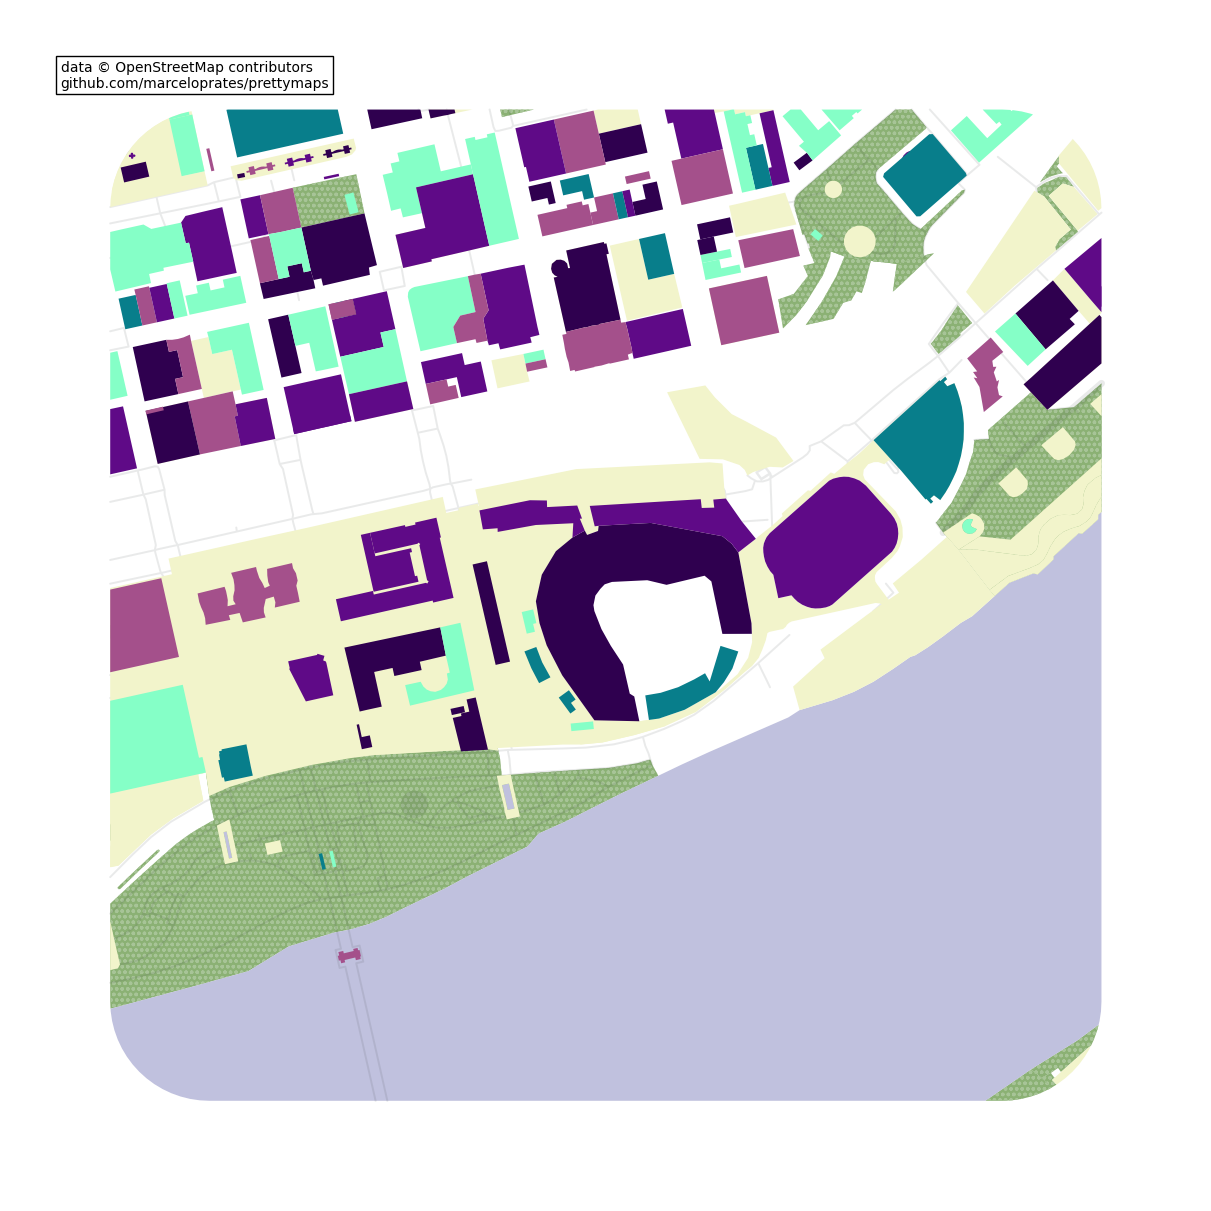

In [ ]:

plot_park(latlon, ,
          dilate=100, save_file_as='test.png')

In [ ]:
presets

<IPython.core.display.Javascript object>

preset                                             params
0          barcelona  {'layers': {'perimeter': {'circle': False}, 's...
1  barcelona-plotter  {'layers': {'streets': {'width': {'primary': 5...
2            cb-bf-f  {'layers': {'streets': {'width': {'trunk': 6, ...
3            default  {'layers': {'perimeter': {}, 'streets': {'widt...
4      heerhugowaard  {'layers': {'perimeter': {}, 'streets': {'widt...
5              macao  {'layers': {'perimeter': {}, 'streets': {'cust...
6            minimal  {'layers': {'perimeter': {}, 'streets': {'widt...
7             tijuca  {'layers': {'perimeter': {}, 'streets': {'widt...

In [ ]:
postprocessing(park)

<IPython.core.display.Javascript object>

TypeError: ignored

In [ ]:
park.geodataframes['building']

<IPython.core.display.Javascript object>

amenity  \
element_type osmid                
way          25564082       NaN   
             31009336       NaN   
             31009349       NaN   
             35116603       NaN   
             35116608       NaN   
             35116609       NaN   
             46128814   parking   
             98323958       NaN   
             98323960       NaN   
             137516402  parking   
             137518795      pub   
             199162430      NaN   
             199162432      NaN   
             199162434      NaN   
             199162436      NaN   
             396644067      NaN   
             396644068      NaN   

                                                                 geometry  \
element_type osmid                                                          
way          25564082   POLYGON ((-84.50479 39.09738, -84.50484 39.097...   
             31009336   POLYGON ((-84.50673 39.09636, -84.50725 39.096...   
             31009349   POLYGON ((-84.50665 39.09659, -84.50647 39.096...   
             35116603   POLYGON ((-84.50845 39.09785, -84.50833 39.097...   
             35116608   POLYGON ((-84.50793 39.09839, -84.50774 39.098...   
             35116609   POLYGON ((-84.50594 39.09836, -84.50593 39.098...   
             46128814   POLYGON ((-84.50926 39.09925, -84.50933 39.099...   
             98323958   POLYGON ((-84.50902 39.09726, -84.50896 39.097...   
             98323960   POLYGON ((-84.50933 39.09819, -84.50927 39.098...   
             137516402  POLYGON ((-84.50933 39.09799, -84.50932 39.097...   
             137518795  POLYGON ((-84.50882 39.09613, -84.50890 39.096...   
             199162430  POLYGON ((-84.50791 39.09706, -84.50784 39.096...   
             199162432  POLYGON ((-84.50793 39.09740, -84.50790 39.097...   
             199162434  POLYGON ((-84.50754 39.09666, -84.50746 39.096...   
             199162436  POLYGON ((-84.50727 39.09637, -84.50726 39.096...   
             396644067  POLYGON ((-84.50878 39.09730, -84.50871 39.096...   
             396644068  POLYGON ((-84.50877 39.09654, -84.50876 39.096...   

                                                                name  \
element_type osmid                                                     
way          25564082                           Heritage Bank Center   
             31009336                                            NaN   
             31009349                                            NaN   
             35116603        Cincinnati Reds Hall of Fame and Museum   
             35116608                                            NaN   
             35116609                                            NaN   
             46128814                                            NaN   
             98323958                           Current at The Banks   
             98323960                           Current at the Banks   
             137516402                                           NaN   
             137518795                          Moerlein Lager House   
             199162430                                           NaN   
             199162432                                           NaN   
             199162434                                           NaN   
             199162436                                           NaN   
             396644067  AC Hotel by Marriott Cincinnati at The Banks   
             396644068                                           NaN   

                                                                    nodes  \
element_type osmid                                                          
way          25564082   [278634203, 344794906, 2820199166, 2820199159,...   
             31009336   [344796317, 344796318, 344796319, 344796320, 3...   
             31009349   [344796437, 344796438, 344796439, 344796440, 3...   
             35116603   [411966754, 411966756, 344794726, 2091961544, ...   
             35116608   [411968610, 411968613, 411968616, 41196

In [ ]:
x = park.geodataframes['building']
x

<IPython.core.display.Javascript object>

amenity  \
element_type osmid                
way          25564082       NaN   
             31009336       NaN   
             31009349       NaN   
             35116603       NaN   
             35116608       NaN   
             35116609       NaN   
             46128814   parking   
             98323958       NaN   
             98323960       NaN   
             137516402  parking   
             137518795      pub   
             199162430      NaN   
             199162432      NaN   
             199162434      NaN   
             199162436      NaN   
             396644067      NaN   
             396644068      NaN   

                                                                 geometry  \
element_type osmid                                                          
way          25564082   POLYGON ((-84.50479 39.09738, -84.50484 39.097...   
             31009336   POLYGON ((-84.50673 39.09636, -84.50725 39.096...   
             31009349   POLYGON ((-84.50665 39.09659, -84.50647 39.096...   
             35116603   POLYGON ((-84.50845 39.09785, -84.50833 39.097...   
             35116608   POLYGON ((-84.50793 39.09839, -84.50774 39.098...   
             35116609   POLYGON ((-84.50594 39.09836, -84.50593 39.098...   
             46128814   POLYGON ((-84.50926 39.09925, -84.50933 39.099...   
             98323958   POLYGON ((-84.50902 39.09726, -84.50896 39.097...   
             98323960   POLYGON ((-84.50933 39.09819, -84.50927 39.098...   
             137516402  POLYGON ((-84.50933 39.09799, -84.50932 39.097...   
             137518795  POLYGON ((-84.50882 39.09613, -84.50890 39.096...   
             199162430  POLYGON ((-84.50791 39.09706, -84.50784 39.096...   
             199162432  POLYGON ((-84.50793 39.09740, -84.50790 39.097...   
             199162434  POLYGON ((-84.50754 39.09666, -84.50746 39.096...   
             199162436  POLYGON ((-84.50727 39.09637, -84.50726 39.096...   
             396644067  POLYGON ((-84.50878 39.09730, -84.50871 39.096...   
             396644068  POLYGON ((-84.50877 39.09654, -84.50876 39.096...   

                                                                name  \
element_type osmid                                                     
way          25564082                           Heritage Bank Center   
             31009336                                            NaN   
             31009349                                            NaN   
             35116603        Cincinnati Reds Hall of Fame and Museum   
             35116608                                            NaN   
             35116609                                            NaN   
             46128814                                            NaN   
             98323958                           Current at The Banks   
             98323960                           Current at the Banks   
             137516402                                           NaN   
             137518795                          Moerlein Lager House   
             199162430                                           NaN   
             199162432                                           NaN   
             199162434                                           NaN   
             199162436                                           NaN   
             396644067  AC Hotel by Marriott Cincinnati at The Banks   
             396644068                                           NaN   

                                                                    nodes  \
element_type osmid                                                          
way          25564082   [278634203, 344794906, 2820199166, 2820199159,...   
             31009336   [344796317, 344796318, 344796319, 344796320, 3...   
             31009349   [344796437, 344796438, 344796439, 344796440, 3...   
             35116603   [411966754, 411966756, 344794726, 2091961544, ...   
             35116608   [411968610, 411968613, 411968616, 41196

In [ ]:
# def postprocessing(df):
#   all_buildings = df.geodataframes['building']
#   my_building = df.loc[df['building']=='stadium']
#   df.geodataframes['building'] = my_building
#   return df

def postprocessing(gdfs):
  all_buildings = gdfs['building']
  my_building = all_buildings.loc[[('way',biggest_boi)]]
  gdfs['building'] = my_building
  # print(type(all_buildings))
  # display(HTML(all_buildings.to_html()))
  return gdfs

<IPython.core.display.Javascript object>

In [ ]:
x = park.geodataframes['building']
x.loc[[('way',25564082)]]

<IPython.core.display.Javascript object>

amenity  \
element_type osmid              
way          25564082     NaN   

                                                                geometry  \
element_type osmid                                                         
way          25564082  POLYGON ((-84.50444 39.09850, -84.50439 39.098...   

                                       name historic tourism  \
element_type osmid                                             
way          25564082  Heritage Bank Center      NaN     NaN   

                                                                   nodes  \
element_type osmid                                                         
way          25564082  [278634203, 344794906, 2820199166, 2820199159,...   

                      addr:state building  ele gnis:county_id  ...  \
element_type osmid                                             ...   
way          25564082         OH  stadium  150            061  ...   

                      gnis:state_id building:height:underground  \
element_type osmid                                                
way          25564082           NaN                         NaN   

                      building:levels:underground phone alcohol cuisine  \
element_type osmid                                                        
way          25564082                         NaN   NaN     NaN     NaN   

                      disused:amenity theme internet_access  \
element_type osmid                                            
way          25564082             NaN   NaN             NaN   

                      internet_access:fee  
element_type osmid                         
way          25564082                 NaN  

[1 rows x 52 columns]

In [ ]:
z['addr:housenumber']

<IPython.core.display.Javascript object>

0     NaN
1     NaN
2     221
3     NaN
4     NaN
5     NaN
6     100
7     NaN
8     NaN
9     312
10    NaN
11    NaN
12    NaN
13    NaN
14    NaN
15    NaN
16    NaN
17    NaN
18    NaN
19    NaN
20    NaN
21    NaN
22    NaN
23    NaN
24    NaN
25    NaN
26    NaN
27    NaN
28    NaN
29    115
30    NaN
31    NaN
32    NaN
33    NaN
34    NaN
35    307
36     95
37    NaN
38    NaN
39    NaN
40    NaN
41    NaN
Name: addr:housenumber, dtype: object

<IPython.core.display.Javascript object>

/usr/local/lib/python3.10/dist-packages/osmnx/geometries.py:358: FutureWarning: You are adding a column named 'geometry' to a GeoDataFrame constructed without an active geometry column. Currently, this automatically sets the active geometry column to 'geometry' but in the future that will no longer happen. Instead, either provide geometry to the GeoDataFrame constructor (GeoDataFrame(... geometry=GeoSeries()) or use `set_geometry('geometry')` to explicitly set the active geometry column.
  gdf["geometry"] = np.nan
/usr/local/lib/python3.10/dist-packages/osmnx/geometries.py:358: FutureWarning: You are adding a column named 'geometry' to a GeoDataFrame constructed without an active geometry column. Currently, this automatically sets the active geometry column to 'geometry' but in the future that will no longer happen. Instead, either provide geometry to the GeoDataFrame constructor (GeoDataFrame(... geometry=GeoSeries()) or use `set_geometry('geometry')` to explicitly set the active geom

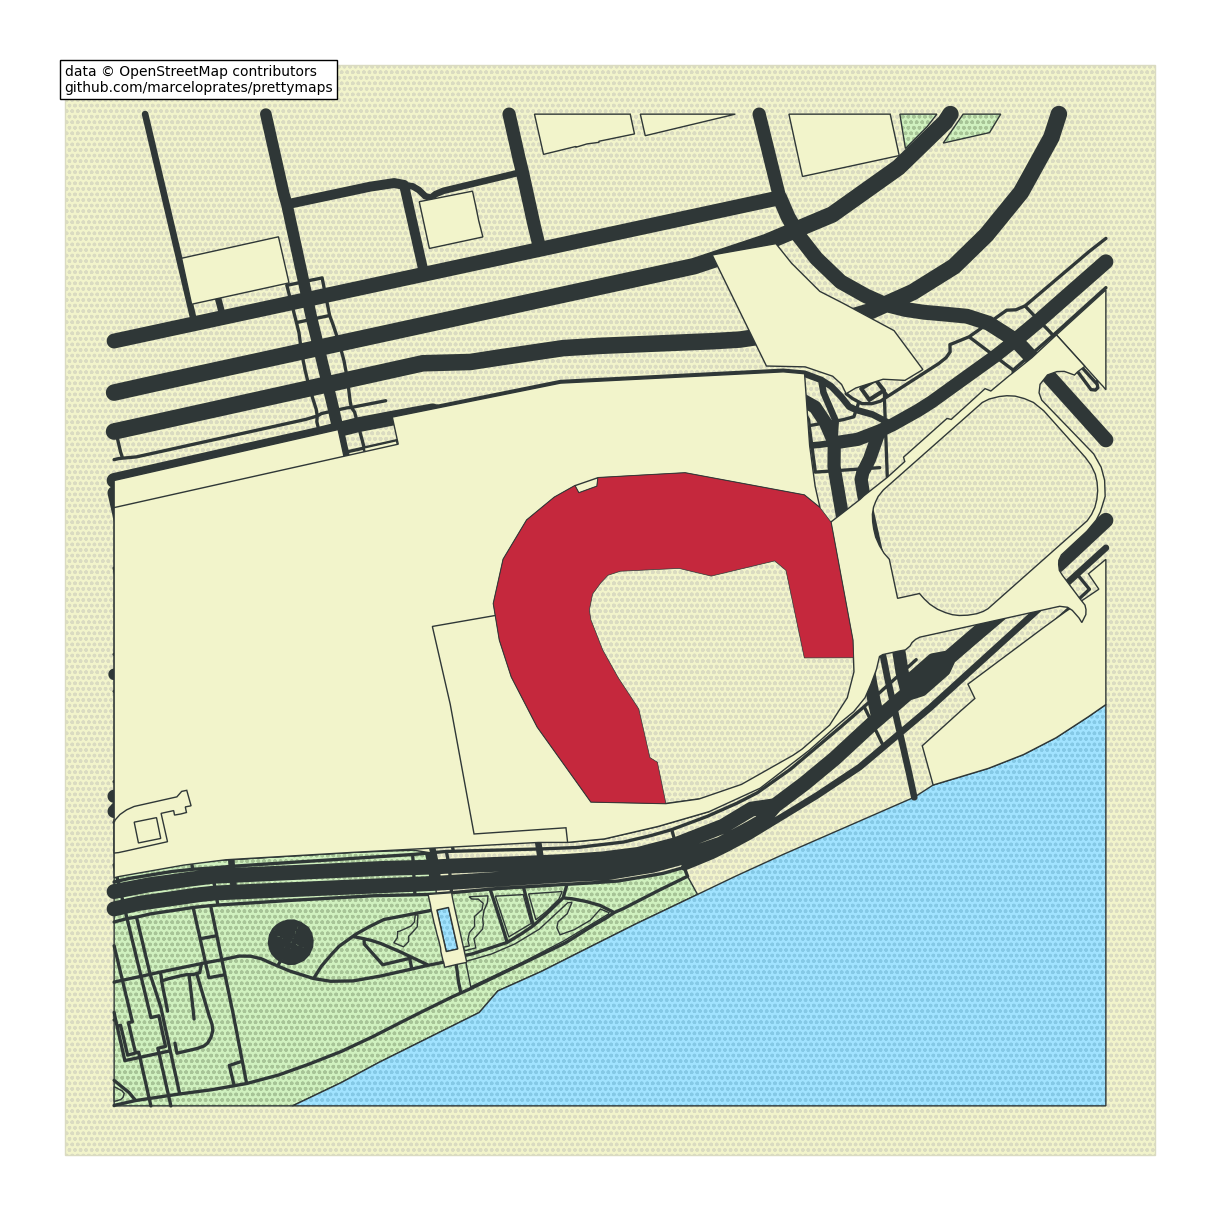

In [ ]:
latlon = (39.09742224881585, -84.50708215692207)

style = {'layers': {'perimeter': {},
  'streets': {'width': {'motorway': 5,
    'trunk': 5,
    'primary': 4,
    'secondary': 3,
    'tertiary': 2,
    'residential': 2}},
  'building': {'tags': {'building': True}}},
 'style': {'background': {'fc': '#F2F4CB',
   'ec': '#dadbc1',
   'hatch': 'ooo...',
   'zorder': -1},
  'perimeter': {'fc': '#F2F4CB',
   'ec': '#dadbc1',
   'lw': 0,
   'hatch': 'ooo...',
   'zorder': 0},
  'green': {'fc': '#D0F1BF', 'ec': '#2F3737', 'lw': 1, 'zorder': 1},
  'forest': {'fc': '#64B96A', 'ec': '#2F3737', 'lw': 1, 'zorder': 1},
  'water': {'fc': '#a1e3ff',
   'ec': '#2F3737',
   'hatch': 'ooo...',
   'hatch_c': '#85c9e6',
   'lw': 1,
   'zorder': 2},
  'parking': {'fc': '#F2F4CB', 'ec': '#2F3737', 'lw': 1, 'zorder': 3},
  'streets': {'fc': '#2F3737',
   'ec': '#475657',
   'alpha': 1,
   'lw': 0,
   'zorder': 3},
  'building': {'palette': ['#FFC857', '#E9724C', '#C5283D'],
   'ec': '#2F3737',
   'lw': 0.5,
   'zorder': 4}},
 'circle': None,
 'radius': 400}

# park = pm.plot(latlon, radius=300)
# x = park.geodataframes['building']
# z = x.reset_index()
# biggest_boi = pd.DataFrame([{row['osmid']:row['geometry'].area for idx, row in z.loc[:, ['osmid', 'geometry']].iterrows()}]).idxmax(axis=1).values[0]

park = pm.plot(
      latlon, radius=300,
      # layers = {
      #     'perimeter':{'lw':1},
      #     "building": {
      #       "tags": {
      #           "building": 'stadium'
      #       }
      #   },
      #     'streets': {'width': {
      #                 'motorway': 0,
      #                 'trunk': 0,
      #                 'primary': 0,
      #                 'secondary': 0,
      #                 'tertiary': 0,
      #                 'residential': 0,
      #                 'service': 0,
      #                 'unclassified': 0,
      #                 'pedestrian': 0,
      #                 'footway': 0,
      #             }
      #         }
      # },
      # layers = style['layers'],
      style = style['style'],
      # preset = 'minimal'
      postprocessing=postprocessing
  )

<IPython.core.display.Javascript object>

dict_keys(['perimeter', 'streets', 'building', 'water', 'forest', 'green', 'beach', 'parking'])

In [ ]:
df = park.geodataframes['building']
# df = df.reset_index()
# df['osmid'].unique()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

amenity  \
element_type osmid               
way          25564082      NaN   
             31009336      NaN   
             31009349      NaN   
             35116608      NaN   
             35116609      NaN   
             199162430     NaN   
             199162432     NaN   
             199162434     NaN   
             199162436     NaN   

                                                                 geometry  \
element_type osmid                                                          
way          25564082   POLYGON ((-84.50479 39.09738, -84.50484 39.097...   
             31009336   POLYGON ((-84.50673 39.09636, -84.50725 39.096...   
             31009349   POLYGON ((-84.50665 39.09659, -84.50647 39.096...   
             35116608   POLYGON ((-84.50793 39.09839, -84.50774 39.098...   
             35116609   POLYGON ((-84.50594 39.09836, -84.50593 39.098...   
             199162430  POLYGON ((-84.50791 39.09706, -84.50784 39.096...   
             199162432  POLYGON ((-84.50793 39.09740, -84.50790 39.097...   
             199162434  POLYGON ((-84.50754 39.09666, -84.50746 39.096...   
             199162436  POLYGON ((-84.50727 39.09637, -84.50726 39.096...   

                                        name  \
element_type osmid                             
way          25564082   Heritage Bank Center   
             31009336                    NaN   
             31009349                    NaN   
             35116608                    NaN   
             35116609                    NaN   
             199162430                   NaN   
             199162432                   NaN   
             199162434                   NaN   
             199162436                   NaN   

                                                                    nodes  \
element_type osmid                                                          
way          25564082   [278634203, 344794906, 2820199166, 2820199159,...   
             31009336   [344796317, 344796318, 344796319, 344796320, 3...   
             31009349   [344796437, 344796438, 344796439, 344796440, 3...   
             35116608   [411968610, 411968613, 411968616, 411968619, 4...   
             35116609   [411969768, 411969772, 344796474, 267293049, 3...   
             199162430  [2091961580, 2091961602, 2091961548, 209196159...   
             199162432  [2091961600, 2091961599, 2091961586, 209196156...   
             199162434  [2091961554, 2091961588, 2091961597, 209196155...   
             199162436  [2091961584, 2091961576, 2091961578, 209196156...   

                       addr:state building  ele gnis:county_id  \
element_type osmid                                               
way          25564082          OH  stadium  150            061   
             31009336         NaN  stadium  NaN            NaN   
             31009349         NaN  stadium  NaN            NaN   
             35116608         NaN  stadium  NaN            NaN   
             35116609         NaN  stadium  NaN            NaN   
             199162430        NaN  stadium  NaN            NaN   
             199162432        NaN  stadium  NaN            NaN   
             199162434        NaN  stadium  NaN            NaN   
             199162436        NaN  stadium  NaN            NaN   

                       gnis:county_name gnis:created  ... opening_hours  \
element_type osmid                                    ...                 
way          25564082          Hamilton   11/17/2003  ...           NaN   
             31009336               NaN          NaN  ...           NaN   
             31009349               NaN          NaN  ...           NaN   
             35116608               NaN          NaN  ...           NaN   
             35116609               NaN          NaN  ...           NaN   
             199162430              NaN          NaN  ...           NaN   
             199162432              NaN          NaN  ...           NaN   
             19916243

<IPython.core.display.Javascript object>

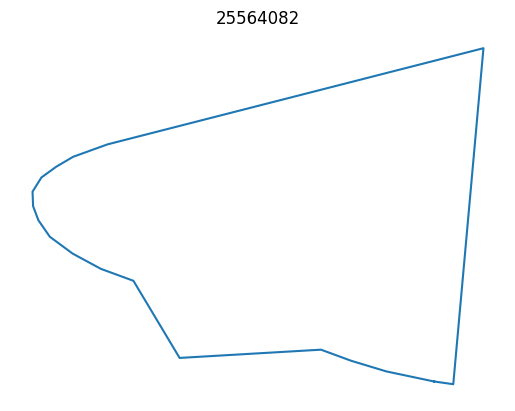

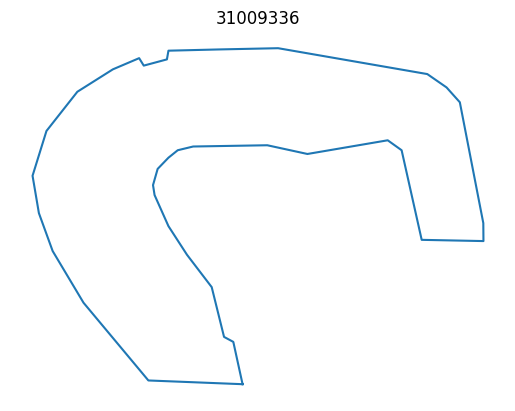

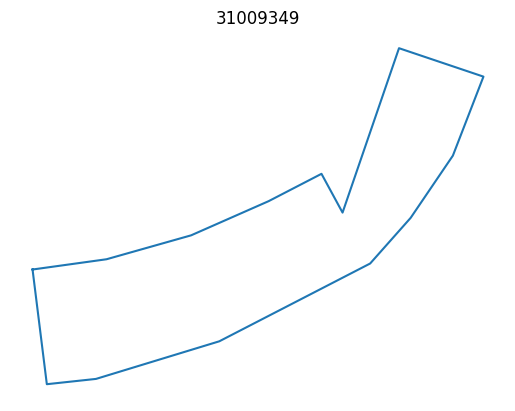

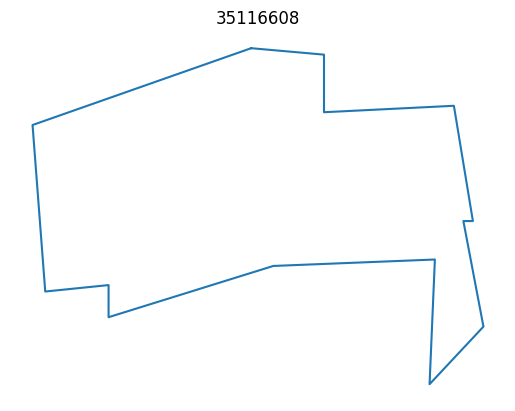

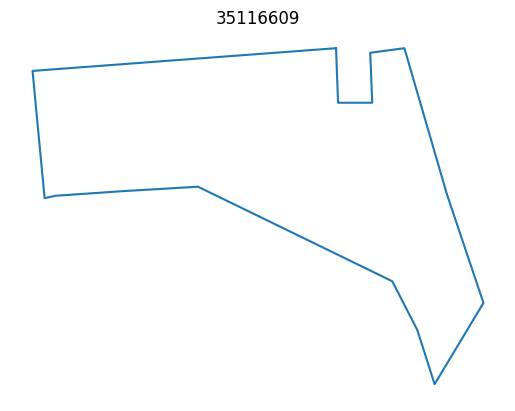

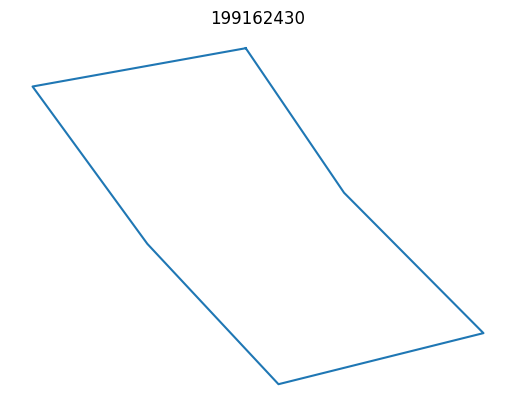

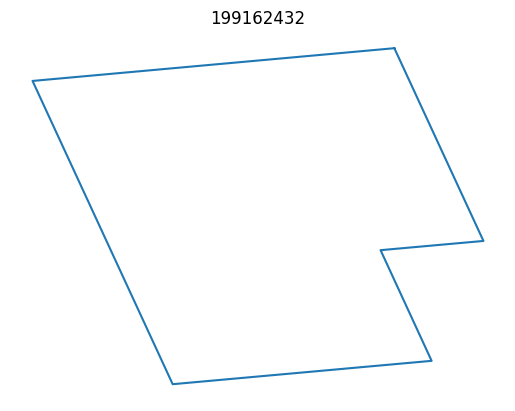

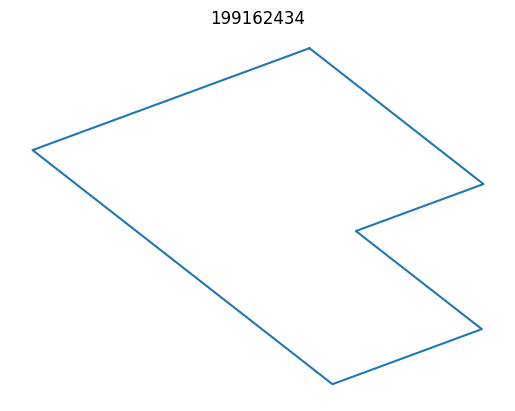

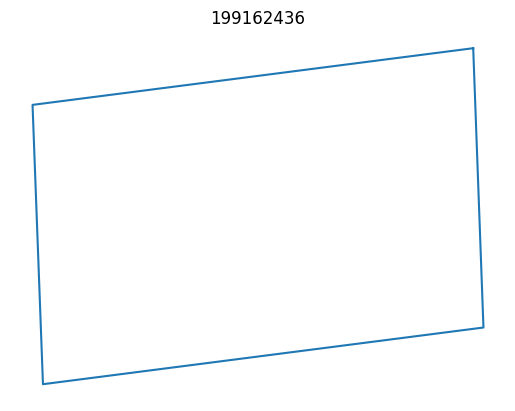

In [ ]:
for b in df['osmid'].unique():
  if type(b) == float:
    continue
  x = df[df['osmid'] ==b].geometry.values[0]
  plt.plot(*x.exterior.xy)
  plt.title(b)
  sns.despine(left=True, bottom=True)
  plt.gca().xaxis.set_visible(False)
  plt.gca().yaxis.set_visible(False)
  plt.show()

/usr/local/lib/python3.10/dist-packages/osmnx/geometries.py:358: FutureWarning: You are adding a column named 'geometry' to a GeoDataFrame constructed without an active geometry column. Currently, this automatically sets the active geometry column to 'geometry' but in the future that will no longer happen. Instead, either provide geometry to the GeoDataFrame constructor (GeoDataFrame(... geometry=GeoSeries()) or use `set_geometry('geometry')` to explicitly set the active geometry column.
  gdf["geometry"] = np.nan
/usr/local/lib/python3.10/dist-packages/osmnx/geometries.py:358: FutureWarning: You are adding a column named 'geometry' to a GeoDataFrame constructed without an active geometry column. Currently, this automatically sets the active geometry column to 'geometry' but in the future that will no longer happen. Instead, either provide geometry to the GeoDataFrame constructor (GeoDataFrame(... geometry=GeoSeries()) or use `set_geometry('geometry')` to explicitly set the active geom

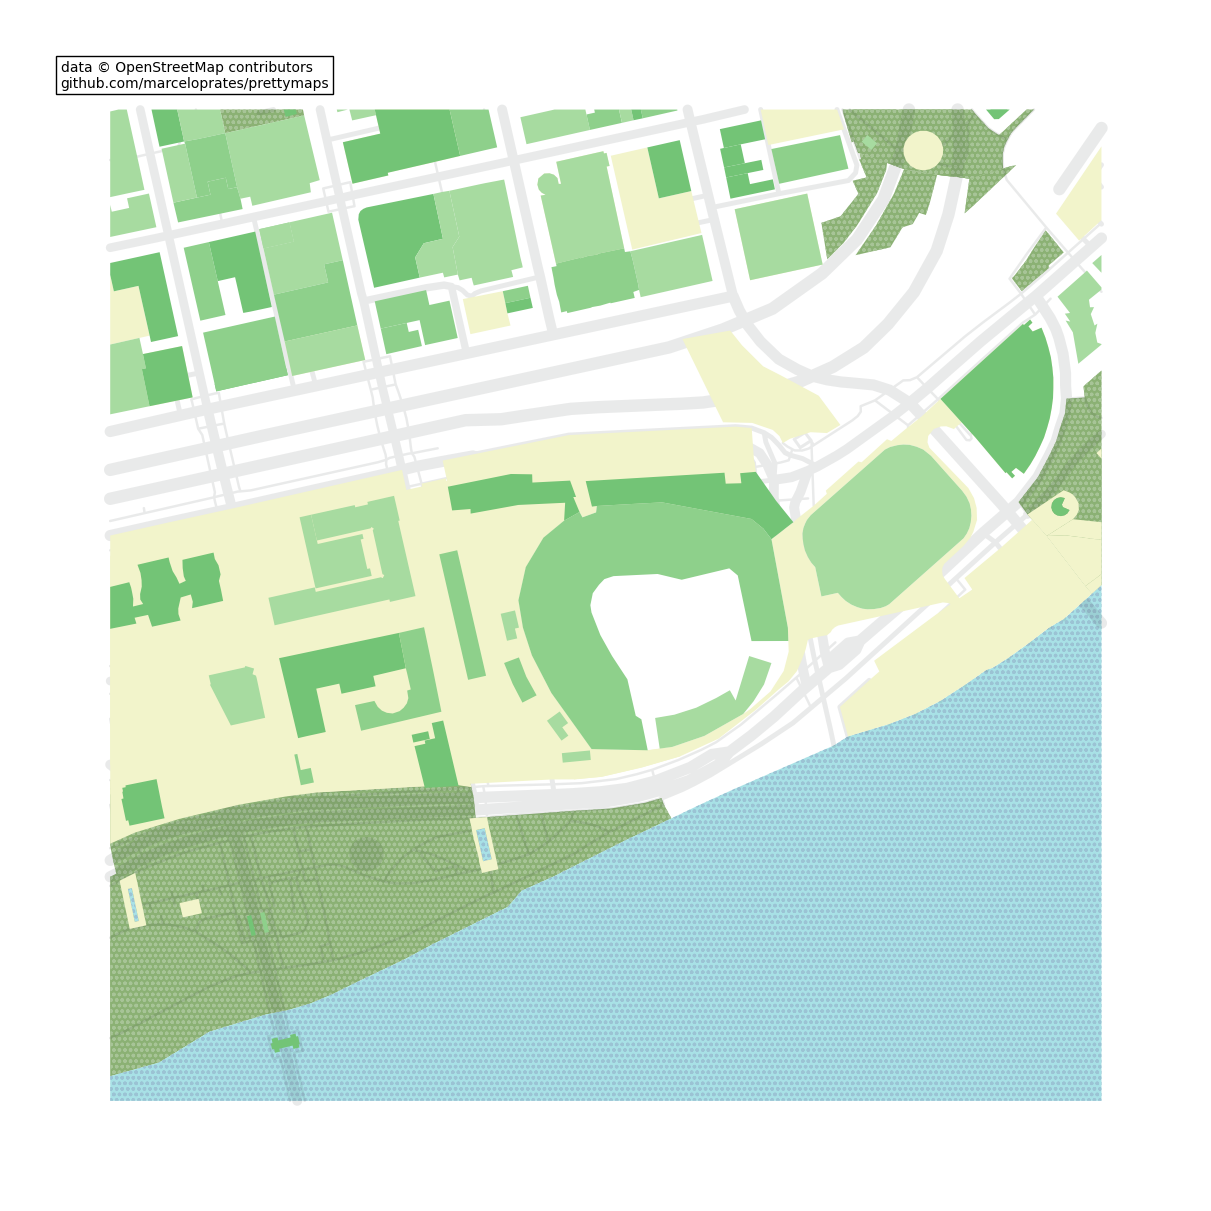

/usr/local/lib/python3.7/dist-packages/geopandas/_vectorized.py:289: DeprecationWarning: An exception was ignored while fetching the attribute `__array_interface__` from an object of type 'Polygon'.  With the exception of `AttributeError` NumPy will always raise this exception in the future.  Raise this deprecation warning to see the original exception. (Warning added NumPy 1.21)
  for s in left
/usr/local/lib/python3.7/dist-packages/geopandas/_vectorized.py:289: DeprecationWarning: An exception was ignored while fetching the attribute `__array_interface__` from an object of type 'MultiPolygon'.  With the exception of `AttributeError` NumPy will always raise this exception in the future.  Raise this deprecation warning to see the original exception. (Warning added NumPy 1.21)
  for s in left
/usr/local/lib/python3.7/dist-packages/geopandas/_vectorized.py:142: DeprecationWarning: An exception was ignored while fetching the attribute `__array_interface__` from an object of type 'Polygon'

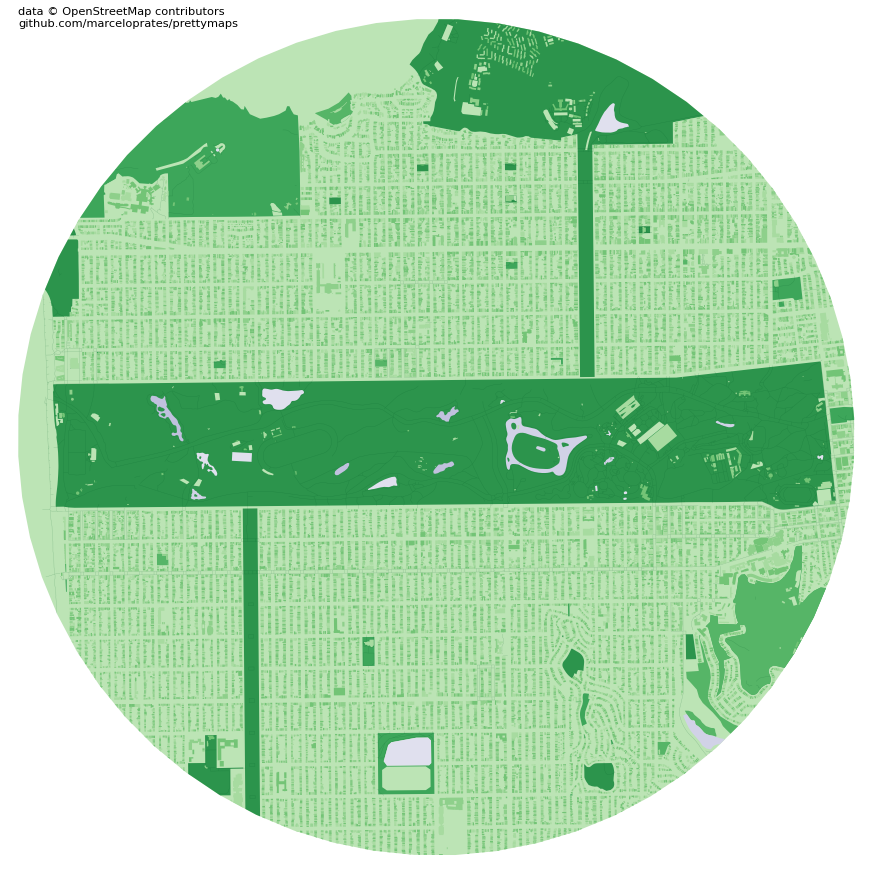

In [ ]:
plot_park(latlon = (37.76923682384129, -122.48264831467573),
          radius = 2700 , is_circle = True , dilate = 100 ,
          rotation = -3, save_file_as = 'ggp.png')

In [ ]:
parks = {'sd':[(32.70738637975316, -117.15698993119769), 0],
         'laa':[(33.800013212881964, -117.88285111049638),42],
         'lan':[(34.07364506640421, -118.23989496416107),29],
         'sf':[(37.7782628123678, -122.38955235987186),84],
         'oak':[(37.75138170229226, -122.20062394834629), 55],
         'sea':[(47.59120423451982, -122.33253589359587),47],
         'az':[(33.44532562366687, -112.06670740211457),3],
         'col':[(39.75585811808405, -104.99404176080398),6],
         'min':[(44.981628557976336, -93.27785845836291), 90],
         'mil':[(43.02825992649673, -87.97156882607666), 129],
         'chn':[(41.947903640608764, -87.65549057316485), 37],
         'cha':[(41.829926062290895, -87.63409381725823), 128],
         'kc':[(39.0515052437723, -94.48035711691766), 49],
         'hou':[(29.757153657916405, -95.35541264738546), -15],
         'tex':[(32.75125894074603, -97.08263095147421), 135],
         'det':[(42.33922324258718, -83.04897301725654), 153],
         'cin':[(39.097227221791925, -84.50682672587801), 121],
         'cle':[(41.49592,-81.68532),4],
         'stl':[(38.62258,-90.19285), 62],
         'atl':[(33.89075089454321, -84.46771806509375), 156],
         'tam':[(27.768067432253048, -82.65325116138808), 0],
         'mia':[(25.778036823565316, -80.21953342544572), 130],
         'was':[(38.87278, -77.00743),32],
         'bal':[(39.28369,-76.62157),30],
         'pit':[(40.44695,-80.00557), 114],
         'phi':[(39.90599,-75.16647),9], #long render, ped streets
         'nyn':[(40.75693,-73.84590), 12],
         'nya':[(40.82958,-73.92637),73],
         'bos':[(42.34655,-71.09734), 49],
         'tor':[(43.64152,-79.38921), -15]}

radius = 400
is_circle = True
dilate = 100
save_file_as = f'mlb-parks.png'
_circle = {'circle': False, 'dilate': dilate}

streets_color = sns.palettes.color_palette('gray_r', n_colors=13).as_hex()[0]
bkgd_color = sns.palettes.color_palette('gray_r', n_colors=13).as_hex()[4]
stadium_color = sns.palettes.color_palette('bone_r', n_colors=13).as_hex()[-3]
field_color = sns.palettes.color_palette('bone_r', n_colors=13).as_hex()[0]
water_color = sns.palettes.color_palette('Purples', n_colors=13).as_hex()[4]
cmap_buildings = sns.palettes.color_palette('gray_r', n_colors=13)
cmap_buildings = [x for x in cmap_buildings.as_hex()[1:4]]

In [ ]:
warnings.filterwarnings('ignore')

targets = [['sea','oak','laa','tex','hou'],
           ['min', 'det','cha','cle','kc'],
           ['tor','bos','nya','bal','tam'],
           ['sf','lan','sd','az','col'],
           ['mil', 'chn', 'cin', 'stl', 'pit'],
           ['nyn','phi','was','atl','mia']]
fig, axes = plt.subplots(nrows=5, ncols=6, figsize =(48, 40),
                         constrained_layout=True)

for row_idx, _ in enumerate(range(len(axes))):
  _targets = [targets[x][row_idx] for x in range(len(targets))]
  for col_idx, target in enumerate(_targets):
    if (row_idx == len(axes)-1) & (col_idx == len(_targets)-1):
      osm_credit = {'x': 0, 'y': 1, 'color': stadium_color, 'alpha':1}
    else:
      osm_credit = {'x': 0, 'y': 1, 'color': stadium_color, 'alpha':0}
    latlon = parks[target][0]
    rotation = parks[target][1]
    random.shuffle(cmap_buildings)

    if is_circle:
      _circle = {}

    layers = {# Perimeter (in this case, a circle)
                'perimeter': _circle,
                # Streets and their widths
                'streets': {'width': {
                        'motorway': 2,
                        'trunk': 1,
                        'primary': 1,
                        'secondary': 1,
                        'tertiary': 1,
                        'residential': 1,
                        'service': 1,
                        'unclassified': 1,
                        'pedestrian': 1,
                        'footway': 1,
                    }, **_circle
                },
                # Other layers:
                #   Specify a name (for example, 'building') and which OpenStreetMap tags to fetch
              'stadium': {'tags': {'sport': 'baseball', 'wikidata':'Q753529'}, 'union': False, **_circle},
              'non-baseball': {'tags': {'sport':['basketball', 'american_football',
                                                'soccer'], 'wikidata':'Q14714452'},
                              'union': False, **_circle},
              'building': {'tags': {'building':True}, 'union': False, **_circle},
                'leisure': {'tags': {'leisure': ['pitch']}, **_circle},
              'diamond':{'tags':{'natural':'sand'}},
              'water': {'tags': {'natural':['water', 'bay', 'coastline',
                                            'beach', 'wetland', 'cape'],
                                'place':['ocean', 'sea'], }
                        , **_circle},
              'coastline': {
                'file_location':f'{project_dir}/coastline/water_polygons.shp',
                'buffer': 100000, **_circle
            }
            }

    drawing_kwargs = {
                'background': {'fc': '#ffffff', 'zorder': -1},
                'streets': {'fc':streets_color, 'ec': '#E4C1F9', 'lw':0, 'alpha':.6, 'zorder': 0},
                'perimeter': {'fc':bkgd_color, 'ec': '#E4C1F9', 'lw': 0, 'zorder': 0},
                'leisure': {'fc': field_color, 'ec': '#2F3737', 'lw': 0, 'zorder': 5},
                'stadium': {'fc': stadium_color, 'ec': '#ECCE8E', 'lw': 0, 'zorder': 4},
                'diamond': {'fc': stadium_color, 'ec': '#ECCE8E', 'lw': 0, 'zorder': 6},
                'water': {'fc': water_color, 'ec': '#ECCE8E', 'lw': 0, 'zorder': 1},
                'coastline': {'fc': water_color, 'ec': '#ECCE8E', 'lw': 0, 'zorder': 1},
                'building': {'palette': cmap_buildings, 'ec': '#2F3737', 'lw': 0, 'alpha':1, 'zorder': 3},
                'non-baseball': {'palette': cmap_buildings, 'ec': '#2F3737', 'lw': 0, 'alpha':1, 'zorder': 5}
            }

    # Init matplotlib figure

    backup = pm.plot(
        # Address:
        latlon,
        # Plot geometries in a circle of radius:
        radius = radius,
        # Matplotlib axis
        figsize=(8,8),
        ax = axes[row_idx][col_idx],
        # Which OpenStreetMap layers to plot and their parameters:
        layers = layers,
        # drawing_kwargs:
        #   Reference a name previously defined in the 'layers' argument and specify matplotlib parameters to draw it
        drawing_kwargs = drawing_kwargs,
        rotation=rotation,
        osm_credit = osm_credit
    )

warnings.filterwarnings('default')
plt.subplots_adjust(wspace=0, hspace=0)
plt.savefig(f"{project_dir}/{save_file_as}", bbox_inches='tight')
plt.show()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:94: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 


ImportError: ignored

findfont: Font family ['Ubuntu Mono'] not found. Falling back to DejaVu Sans.


ImportError: ignored

<Figure size 3456x2880 with 30 Axes>

# district plots

In [ ]:
# # OSMNX
# import osmnx as ox
# # Matplotlib-related
# import matplotlib.font_manager as fm
# from matplotlib import pyplot as plt
# from descartes import PolygonPatch
# # Shapely
# from shapely.geometry import *
# from shapely.affinity import *
# from shapely.ops import unary_union

In [ ]:
{
        'perimeter': {'circle':False},
        'streets':      {
            'width': {
                'motorway':     12,
                'trunk':        12,
                'primary':      11,
                'secondary':    10,
                'tertiary':     9,
                'residential':  8,
            }, **_circle
        },
        'park':         {'tags': {'leisure': ['park', 'nature_reserve'],
                                  'landuse': ['golf_course', 'meadow', 'military'],
                                  # 'boundary': 'protected_area',
                                  'place': 'square', 'natural': 'grassland',
                                  'amenity': 'hospital'}, **_circle},
        'grass':        {'tags': {'landuse': 'grass', 'natural': 'wood'}, **_circle},
        'wetland':      {'tags': {'natural': 'wetland', 'natural': 'scrub'}, **_circle},
        'beach':        {'tags': {'natural': 'beach'}, **_circle},
        'water':        {'tags': {'natural': 'water'}, **_circle},
        'pedestrian':   {'tags': {'area:highway': 'pedestrian'}, **_circle},
        'building':     {'tags': {'building': True}, **_circle}
    }

{
        'perimeter':    {'ec': '#0F110C', 'fill': False, 'lw': 0},
        'park':         {'fc': '#c9dbba', 'ec': '#8bc49e', 'lw': 0,
                         'zorder': 1, 'hatch': 'ooo...'},
        'grass':        {'fc': '#c9dbba', 'ec': '#64a38d', 'lw': 0,
                         'zorder': 1, 'hatch': 'ooo...'},
        'wetland':      {'fc': '#75dbcb', 'ec': '#AEB441', 'lw': 0,
                         'zorder': 3, 'hatch': 'ooo...'},
        'water':        {'fc': '#75dbcb', 'ec': '#59adcf', 'lw': 0,
                         'zorder': 2, 'hatch': 'ooo...'},
        'beach':        {'fc': '#DCDBA8', 'ec': '#EBD499', 'lw': 0,
                         'zorder': 2, 'hatch': 'ooo...'},
        'pedestrian':   {'fc': '#f5cda7', 'ec': '#638475', 'lw': 0,
                         'zorder': 2, 'hatch': 'ooo...'},
        'streets':      {'fc': '#000000', 'ec': '#706f6f', 'zorder': 3,
                         'lw': 0, 'hatch': 'ooo...'},
        'building':     {'fc': '#faa381', 'ec': '#E7A89C', 'lw': 0,
                         'zorder': 0},
    }

In [ ]:
base_spec = sns.palettes.color_palette('Spectral', n_colors=15)
base_ocean = sns.palettes.color_palette('ocean_r', n_colors=15)
base_green = sns.palettes.color_palette('Greens', n_colors=13)
base_gray = sns.palettes.color_palette('Greys', n_colors=15)
base_purple = sns.palettes.color_palette('Purples', n_colors=15)

pier_color = '#CCA375'
streets_color = base_ocean.as_hex()[4]
beach_color = '#FDECD9'
bkgd_color = base_ocean.as_hex()[0]
water_color = "#438FC1"
water2_color = base_ocean.as_hex()[1]
# cmap_buildings = base_ocean.as_hex()[1:4]
cmap_buildings = base_spec.as_hex()
cmap_greenspace = base_green.as_hex()[2:5]

In [ ]:
city1 = '33.9288,-118.2807'
city2 = '33.94139,-118.26648'

radius = 750
is_circle = False
dilate = 100
_circle = {'circle': False, 'dilate': dilate}
fig, ax = plt.subplots(figsize = (10,10),
                       constrained_layout = True, dpi = 72)

plot_layers = {
          'perimeter': _circle,
          'building': {'tags': {'building':True},
                 'union': False,
                 **_circle},
          'green': {'tags': {'landuse': 'grass',
                             'natural': ['island', 'wood'],
                             'leisure': 'park'},
                    **_circle},
          'pier': {'tags': {'man_made':'pier'},
                   'union': False, **_circle},
          'beach': {'tags': {'natural':'beach'},
                 **_circle},
          'water': {'tags': {'natural':['water', 'bay', 'coastline',
                                  'beach', 'wetland', 'cape'],
                             'place':['ocean', 'sea']},
                    **_circle},
          'coastline': {'file_location':f'{project_dir}/coastline/water_polygons.shp',
                  'buffer': 100000,
                  **_circle}
          }

drawing_kwargs = {
                  'background': {'fc': '#ffffff', 'zorder': -2},
                  'perimeter': {'fc':bkgd_color, 'ec': '#E4C1F9',
                                'lw': 0, 'zorder': -1},
                  'water': {'fc': water_color, 'ec': water2_color,
                            'lw': 1, 'zorder': 0},
                  'green': {'palette': cmap_greenspace, 'ec': '#2F3737',
                         'lw': 0, 'alpha':1, 'zorder': 1},
                  'beach': {'fc': beach_color, 'ec': '#ECCE8E',
                          'lw': 0, 'zorder': 1},
                  'coastline': {'fc': water_color, 'ec': '#ECCE8E',
                                'hatch':'-\\', 'hatch_c':water2_color,
                                'lw': 0, 'zorder': 1},
                  'building': {'palette': cmap_buildings, 'ec': '#2F3737',
                               'lw': 0, 'alpha':1, 'zorder': 6},
                  'pier': {'fc': pier_color, 'ec': pier_color,
                           'alpha':.6, 'lw': 2, 'zorder': 5}
        }

layers1 = pm.plot(
    # City name
    city1,

    # map radius
    radius = radius,
    # Matplotlib 'ax'
    ax = ax,

    # Layers to plot & their kwargs
    layers = plot_layers,
    drawing_kwargs = drawing_kwargs,

    # osm_credit = {'x': -.06, 'y': -.05, 'color': '#706f6f'}
    osm_credit = {'x': .5, 'y': .5, 'color': '#706f6f'}
)

xmin, ymin, xmax, ymax = layers1['perimeter'].bounds
# dx, dy = xmax-xmin, ymax-ymin
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)

plt.subplots_adjust(wspace=0, hspace=0)
plt.savefig(f"{project_dir}/{save_file_as}01.png", bbox_inches='tight')
plt.close()

In [ ]:
def remove_roads(city1, city2, save_file_as, radius = 750, is_circle = False, dilate = 100):
  _circle = {'circle': False, 'dilate': dilate}
  fig, ax = plt.subplots(figsize = (10,10),
                        constrained_layout = True, dpi = 72)
  if is_circle:
    _circle = {}

  plot_layers = {
            'perimeter': _circle,
            'streets': {'width': {'motorway': 3, 'trunk': 3, 'primary': 3,
                            'secondary': 2, 'tertiary': 2, 'residential': 2,
                            'service': 1, 'unclassified': 1, 'pedestrian': 1,
                            'footway': 1},
                  **_circle},
            'building': {'tags': {'building':True},
                  'union': False,
                  **_circle},
            'green': {'tags': {'landuse': 'grass',
                              'natural': ['island', 'wood'],
                              'leisure': 'park'},
                      **_circle},
            'pier': {'tags': {'man_made':'pier'},
                    'union': False, **_circle},
            'beach': {'tags': {'natural':'beach'},
                  **_circle},
            'water': {'tags': {'natural':['water', 'bay', 'coastline',
                                    'beach', 'wetland', 'cape'],
                              'place':['ocean', 'sea']},
                      **_circle},
            'coastline': {'file_location':f'{project_dir}/coastline/water_polygons.shp',
                    'buffer': 100000,
                    **_circle}
            }

  drawing_kwargs = {
                    'background': {'fc': '#ffffff', 'zorder': -2},
                    'streets': {'fc':streets_color, 'ec': '#E4C1F9',
                                'lw':0, 'alpha':.6, 'zorder': 3},
                    'perimeter': {'fc':bkgd_color, 'ec': '#E4C1F9',
                                  'lw': 0, 'zorder': -1},
                    'water': {'fc': water_color, 'ec': water2_color,
                              'lw': 1, 'zorder': 0},
                    'green': {'palette': cmap_greenspace, 'ec': '#2F3737',
                          'lw': 0, 'alpha':1, 'zorder': 1},
                    'beach': {'fc': beach_color, 'ec': '#ECCE8E',
                            'lw': 0, 'zorder': 1},
                    'coastline': {'fc': water_color, 'ec': '#ECCE8E',
                                  'hatch':'-\\', 'hatch_c':water2_color,
                                  'lw': 0, 'zorder': 1},
                    'building': {'palette': cmap_buildings, 'ec': '#2F3737',
                                'lw': 0, 'alpha':1, 'zorder': 6},
                    'pier': {'fc': pier_color, 'ec': pier_color,
                            'alpha':.6, 'lw': 2, 'zorder': 5}
          }

  layers = pm.plot(
      # City name
      city1,

      # map radius
      radius = radius,
      # Matplotlib 'ax'
      ax = ax,

      # Layers to plot & their kwargs
      layers = plot_layers,
      drawing_kwargs = drawing_kwargs,

      # osm_credit = {'x': -.06, 'y': -.05, 'color': '#706f6f'}
      osm_credit = {'x': .5, 'y': .5, 'color': '#706f6f'}
  )

  xmin, ymin, xmax, ymax = layers['perimeter'].bounds
  dx, dy = xmax-xmin, ymax-ymin
  ax.set_xlim(xmin, xmax)
  ax.set_ylim(ymin, ymax)
  plt.subplots_adjust(wspace=0, hspace=0)
  plt.savefig(f"{project_dir}/{save_file_as}_roads.png", bbox_inches='tight')
  plt.close()


  fig, ax = plt.subplots(figsize = (10,10),
                        constrained_layout = True, dpi = 72)
  if is_circle:
    _circle = {}

  plot_layers = {
            'perimeter': _circle,
            'building': {'tags': {'building':True},
                  'union': False,
                  **_circle},
            'green': {'tags': {'landuse': 'grass',
                              'natural': ['island', 'wood'],
                              'leisure': 'park'},
                      **_circle},
            'pier': {'tags': {'man_made':'pier'},
                    'union': False, **_circle},
            'beach': {'tags': {'natural':'beach'},
                  **_circle},
            'water': {'tags': {'natural':['water', 'bay', 'coastline',
                                    'beach', 'wetland', 'cape'],
                              'place':['ocean', 'sea']},
                      **_circle},
            'coastline': {'file_location':f'{project_dir}/coastline/water_polygons.shp',
                    'buffer': 100000,
                    **_circle}
            }

  drawing_kwargs = {
                    'background': {'fc': '#ffffff', 'zorder': -2},
                    'perimeter': {'fc':bkgd_color, 'ec': '#E4C1F9',
                                  'lw': 0, 'zorder': -1},
                    'water': {'fc': water_color, 'ec': water2_color,
                              'lw': 1, 'zorder': 0},
                    'green': {'palette': cmap_greenspace, 'ec': '#2F3737',
                          'lw': 0, 'alpha':1, 'zorder': 1},
                    'beach': {'fc': beach_color, 'ec': '#ECCE8E',
                            'lw': 0, 'zorder': 1},
                    'coastline': {'fc': water_color, 'ec': '#ECCE8E',
                                  'hatch':'-\\', 'hatch_c':water2_color,
                                  'lw': 0, 'zorder': 1},
                    'building': {'palette': cmap_buildings, 'ec': '#2F3737',
                                'lw': 0, 'alpha':1, 'zorder': 6},
                    'pier': {'fc': pier_color, 'ec': pier_color,
                            'alpha':.6, 'lw': 2, 'zorder': 5}
          }

  layers1 = pm.plot(
      # City name
      city1,

      # map radius
      radius = radius,
      # Matplotlib 'ax'
      ax = ax,

      # Layers to plot & their kwargs
      layers = plot_layers,
      drawing_kwargs = drawing_kwargs,

      # osm_credit = {'x': -.06, 'y': -.05, 'color': '#706f6f'}
      osm_credit = {'x': .5, 'y': .5, 'color': '#706f6f'}
  )

  xmin, ymin, xmax, ymax = layers1['perimeter'].bounds
  ax.set_xlim(xmin, xmax)
  ax.set_ylim(ymin, ymax)

  plt.subplots_adjust(wspace=0, hspace=0)
  plt.savefig(f"{project_dir}/{save_file_as}01.png", bbox_inches='tight')
  plt.close()

  fig, ax = plt.subplots(figsize = (10,10),
                        constrained_layout = True, dpi = 72)
  plot_layers = {
            'perimeter': _circle,
            'green': {'tags': {'landuse': 'grass',
                              'natural': ['island', 'wood'],
                              'leisure': 'park'},
                      **_circle},
            'building': {'tags': {'building':True},
                  'union': False,
                  **_circle}
            }

  drawing_kwargs = {
                    'background': {'fc': '#ffffff', 'zorder': -2, 'alpha':0},
                    'perimeter': {'fc':bkgd_color, 'ec': '#E4C1F9',
                                  'lw': 0, 'zorder': -1, 'alpha':0},
                    'building': {'palette': cmap_buildings, 'ec': '#2F3737',
                                'lw': 0, 'alpha':1, 'zorder': 7},
                    'green': {'palette': cmap_greenspace, 'ec': '#2F3737',
                              'lw': 0, 'alpha':1, 'zorder': 1},
          }

  layers2 = pm.plot(
      # City name
      city2,

      # map radius
      radius = radius,
      # Matplotlib 'ax'
      ax = ax,

      # Layers to plot & their kwargs
      layers = plot_layers,
      drawing_kwargs = drawing_kwargs,

      # osm_credit = {'x': -.06, 'y': -.05, 'color': '#706f6f'}
      osm_credit = {'x': .5, 'y': .5, 'color': '#706f6f'}
  )

  xmin, ymin, xmax, ymax = layers2['perimeter'].bounds
  ax.set_xlim(xmin, xmax)
  ax.set_ylim(ymin, ymax)

  plt.subplots_adjust(wspace=0, hspace=0)
  plt.savefig(f"{project_dir}/{save_file_as}02.png", bbox_inches='tight')
  plt.close()

  fig, ax = plt.subplots(figsize = (10,10),
                        constrained_layout = True, dpi = 72)


  if is_circle:
    _circle = {}

  plot_layers = {
            'perimeter': _circle,
            'streets': {'width': {'motorway': 0, 'trunk': 3, 'primary': 3,
                            'secondary': 2, 'tertiary': 2, 'residential': 2,
                            'service': 1, 'unclassified': 1, 'pedestrian': 1,
                            'footway': 1},
                  **_circle}
            }

  drawing_kwargs = {
                    'background': {'fc': '#ffffff', 'zorder': -2, 'alpha':0},
                    'streets': {'fc':streets_color, 'ec': '#E4C1F9',
                                'lw':0, 'alpha':.6, 'zorder': 3},
                    'perimeter': {'fc':bkgd_color, 'ec': '#E4C1F9',
                                  'lw': 0, 'zorder': -1, 'alpha':0}
          }

  layers1 = pm.plot(
      # City name
      city1,

      # map radius
      radius = radius,
      # Matplotlib 'ax'
      ax = ax,

      # Layers to plot & their kwargs
      layers = plot_layers,
      drawing_kwargs = drawing_kwargs,

      # osm_credit = {'x': -.06, 'y': -.05, 'color': '#706f6f'}
      osm_credit = {'x': .5, 'y': .5, 'color': '#706f6f'}
  )

  xmin, ymin, xmax, ymax = layers1['perimeter'].bounds
  ax.set_xlim(xmin, xmax)
  ax.set_ylim(ymin, ymax)

  plt.subplots_adjust(wspace=0, hspace=0)
  plt.savefig(f"{project_dir}/{save_file_as}03.png", bbox_inches='tight')
  plt.close()

  roads = Image.open(f"{project_dir}/{save_file_as}_roads.png").convert('RGBA')
  roads.show()

  layer1 = Image.open(f"{project_dir}/{save_file_as}01.png").convert('RGBA')
  layer2 = Image.open(f"{project_dir}/{save_file_as}02.png").convert('RGBA')
  layer3 = Image.open(f"{project_dir}/{save_file_as}03.png").convert('RGBA')
  layer1.paste(layer2, (0, 0), layer2)
  layer1.paste(layer3, (0, 0), layer3)
  layer1.show()

In [ ]:
project_dir

'drive/My Drive/maps-lmao'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:77: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:149: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:197: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:246: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.


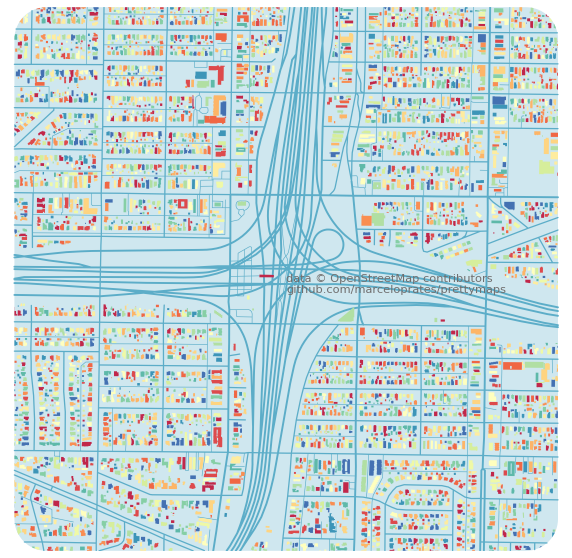

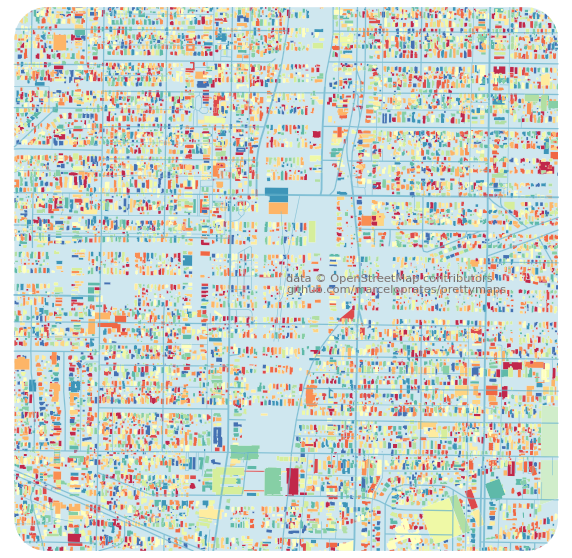

In [ ]:
city1 = '33.9288,-118.2807'
city2 = '33.94139,-118.26648'
remove_roads(city1, city2, save_file_as='harry_pregerson')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:77: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:149: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:197: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:246: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.


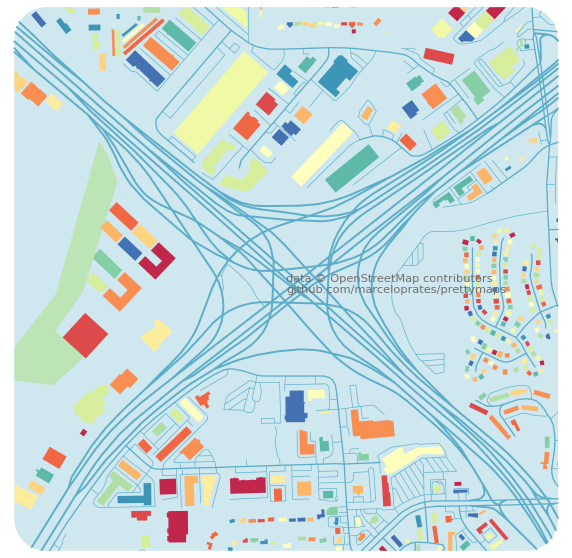

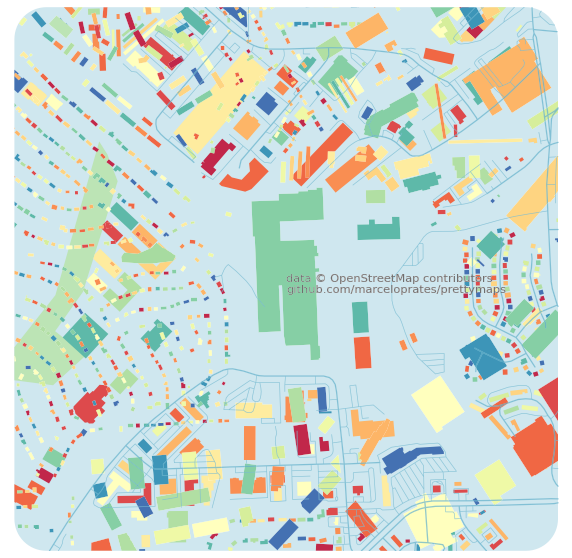

In [ ]:
city1 = '33.8917,-84.2592'
city2 = '33.9130,-84.2470'
remove_roads(city1, city2, save_file_as='tom_moreland')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:77: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:149: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:197: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:246: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.


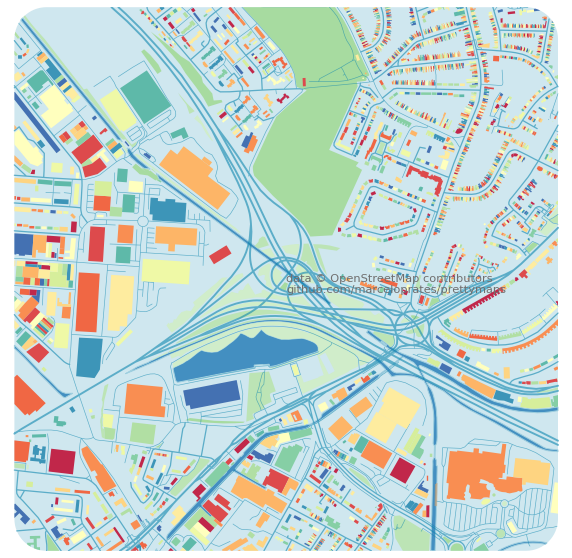

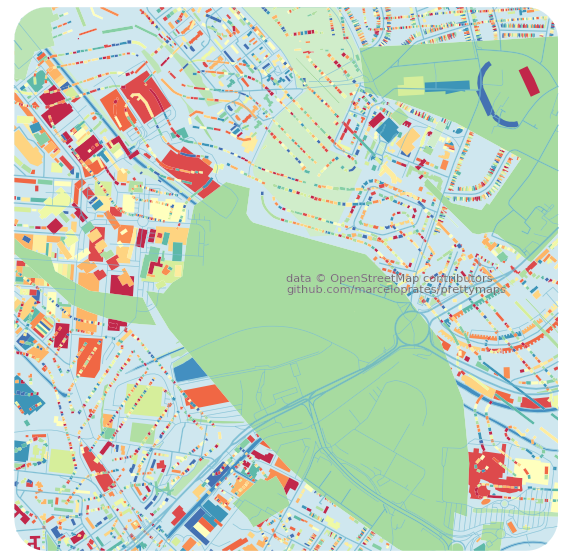

In [ ]:
city1 = '52.5110,-1.8651'
city2 = '52.5269,-1.9174'
remove_roads(city1, city2, save_file_as='spaghetti_junction')

In [ ]:
def postprocessing(layers):
    layers['perimeter'] = layers['perimeter'].buffer(10)
    return layers

ValueError: ignored

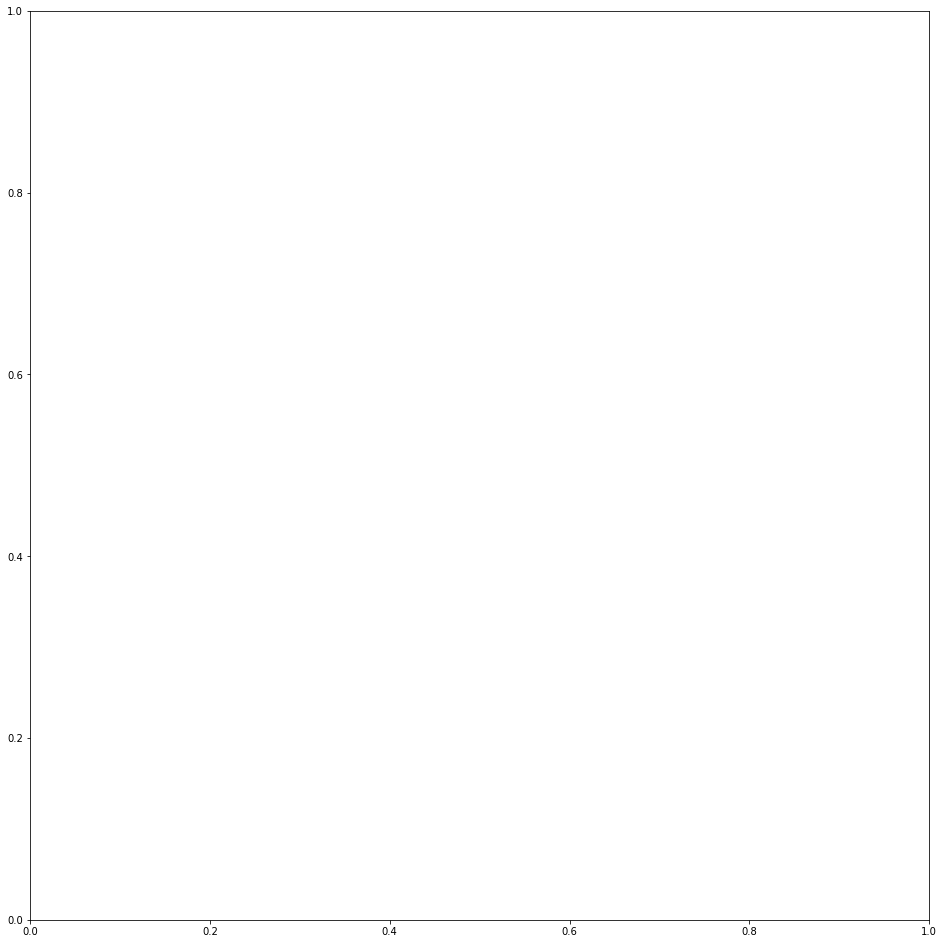

In [ ]:
radius = 1500
is_circle = False
dilate = 50
save_file_as = f'cincinnati.png'
_circle = {'circle': False, 'dilate': dilate}

base_spec = sns.palettes.color_palette('Spectral', n_colors=15)
base_ocean = sns.palettes.color_palette('ocean_r', n_colors=15)
base_green = sns.palettes.color_palette('Greens', n_colors=13)
base_gray = sns.palettes.color_palette('Greys', n_colors=15)
base_red = sns.palettes.color_palette('Reds', n_colors=15)
base_purple = sns.palettes.color_palette('Purples', n_colors=15)

streets_color = base_gray.as_hex()[-4]
beach_color = '#FDECD9'
bkgd_color = base_gray.as_hex()[3]
water_color = "#438FC1"
cmap_buildings = base_spec.as_hex()
cmap_greenspace = base_green.as_hex()[2:5]

osm_credit = {'x': 0, 'y': 1, 'color': base_ocean.as_hex()[-1], 'alpha':1}

latlon = (39.1049,-84.5123)
rotation = 0
random.shuffle(cmap_buildings)
random.shuffle(cmap_greenspace)

places = {0:[(39.1049,-84.5123), ["#ffffff"]],
          1: ['Over-the-Rhine, Cincinnati, Hamilton County, Ohio, 45210, United States', base_red.as_hex()]}


if is_circle:
  _circle = {}

layers = {
          'perimeter': _circle,
          'streets': {'width': {'motorway': 3, 'trunk': 3, 'primary': 3,
                          'secondary': 2, 'tertiary': 2, 'residential': 2,
                          'service': 1, 'unclassified': 1, 'pedestrian': 1,
                          'footway': 1},
                **_circle},
          'building': {'tags': {'building':True},
                 'union': False,
                 **_circle},
          'green': {'tags': {'landuse': 'grass',
                             'natural': ['island', 'wood'],
                             'leisure': 'park'},
                    **_circle},
          'beach': {'tags': {'natural':'beach'},
                 **_circle},
          'water': {'tags': {'natural':['water', 'bay', 'coastline',
                                  'beach', 'wetland', 'cape'],
                             'place':['ocean', 'sea']},
                    **_circle},
          'coastline': {'file_location':f'{project_dir}/coastline/water_polygons.shp',
                  'buffer': 100000,
                  **_circle}
          }

# for k,v in places.items():
# latlon = v[0]
latlon = 'Over-the-Rhine, Cincinnati, Hamilton County, Ohio, 45210, United States'
cmap_buildings = v[1]

drawing_kwargs = {
                  'background': {'fc': '#ffffff', 'zorder': -2},
                  'streets': {'fc':streets_color, 'ec': '#E4C1F9',
                              'lw':0, 'alpha':.6, 'zorder': 3},
                  'perimeter': {'fc':bkgd_color, 'ec': '#E4C1F9',
                                'lw': 0, 'zorder': -1},
                  'water': {'fc': water_color, 'ec': water2_color,
                            'lw': 1, 'zorder': 0},
                  'green': {'palette': cmap_greenspace, 'ec': '#2F3737',
                        'lw': 0, 'alpha':1, 'zorder': 1},
                  'beach': {'fc': beach_color, 'ec': '#ECCE8E',
                          'lw': 0, 'zorder': 1},
                  'coastline': {'fc': water_color, 'ec': '#ECCE8E',
                                'hatch':'-\\', 'hatch_c':water2_color,
                                'lw': 0, 'zorder': 1},
                  'building': {'palette': cmap_buildings, 'ec': '#2F3737',
                              'lw': 0, 'alpha':1, 'zorder': 6}
        }

# Init matplotlib figure
fig, ax = plt.subplots(figsize =(13, 13), constrained_layout=True)
backup = pm.plot(
    # Address:
    latlon,
    # Plot geometries in a circle of radius:
    # radius = radius,
    # Matplotlib axis
    figsize=(13, 13),
    ax = ax,
    postprocessing = postprocessing,
    # Which OpenStreetMap layers to plot and their parameters:
    layers = layers,
    # drawing_kwargs:
    #   Reference a name previously defined in the 'layers' argument and specify matplotlib parameters to draw it
    drawing_kwargs = drawing_kwargs,
    rotation=rotation,
    osm_credit = osm_credit
)

# plt.savefig(f"{project_dir}/{save_file_as}", bbox_inches='tight')
plt.show()

# beach plots

/usr/local/lib/python3.7/dist-packages/geopandas/_vectorized.py:289: DeprecationWarning: An exception was ignored while fetching the attribute `__array_interface__` from an object of type 'Polygon'.  With the exception of `AttributeError` NumPy will always raise this exception in the future.  Raise this deprecation warning to see the original exception. (Warning added NumPy 1.21)
  for s in left
/usr/local/lib/python3.7/dist-packages/geopandas/_vectorized.py:289: DeprecationWarning: An exception was ignored while fetching the attribute `__array_interface__` from an object of type 'MultiPolygon'.  With the exception of `AttributeError` NumPy will always raise this exception in the future.  Raise this deprecation warning to see the original exception. (Warning added NumPy 1.21)
  for s in left
/usr/local/lib/python3.7/dist-packages/geopandas/_vectorized.py:142: DeprecationWarning: An exception was ignored while fetching the attribute `__array_interface__` from an object of type 'Polygon'

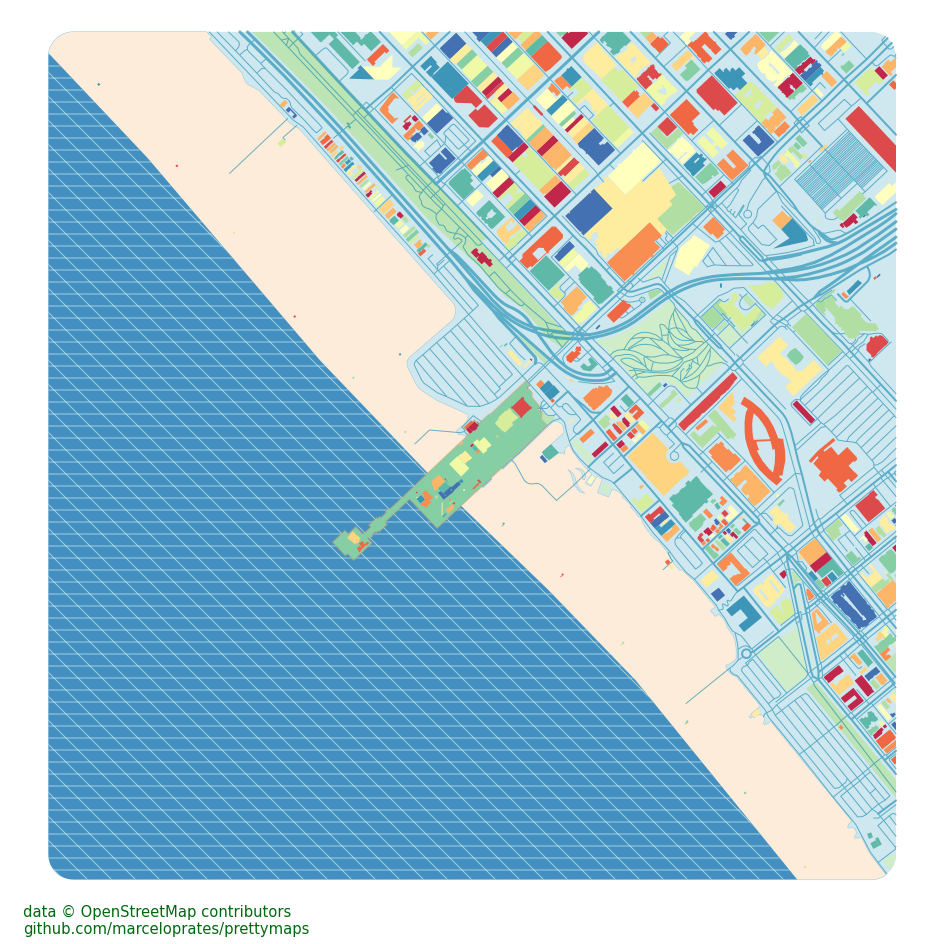

In [ ]:
radius = 800
is_circle = False
dilate = 50
save_file_as = f'sm-pier.png'
_circle = {'circle': False, 'dilate': dilate}

base_spec = sns.palettes.color_palette('Spectral', n_colors=15)
base_ocean = sns.palettes.color_palette('ocean_r', n_colors=15)
base_green = sns.palettes.color_palette('Greens', n_colors=13)
base_gray = sns.palettes.color_palette('Greys', n_colors=15)
base_purple = sns.palettes.color_palette('Purples', n_colors=15)

pier_color = '#CCA375'
streets_color = base_ocean.as_hex()[4]
beach_color = '#FDECD9'
bkgd_color = base_ocean.as_hex()[0]
water_color = "#438FC1"
water2_color = base_ocean.as_hex()[1]
# cmap_buildings = base_ocean.as_hex()[1:4]
cmap_buildings = base_spec.as_hex()
cmap_greenspace = base_green.as_hex()[2:5]

osm_credit = {'x': 0, 'y': 1, 'color': base_ocean.as_hex()[-1], 'alpha':1}

# latlons = {0:[(34.0092,-118.4972), cmap_buildings], 1:[]}
# latlon = (-36.83273,174.79629)
latlon = (34.0092,-118.4972)
rotation = 0
random.shuffle(cmap_buildings)
random.shuffle(cmap_greenspace)

if is_circle:
  _circle = {}

layers = {
          'perimeter': _circle,
          'streets': {'width': {'motorway': 3, 'trunk': 3, 'primary': 3,
                          'secondary': 2, 'tertiary': 2, 'residential': 2,
                          'service': 1, 'unclassified': 1, 'pedestrian': 1,
                          'footway': 1},
                **_circle},
          'building': {'tags': {'building':True},
                 'union': False,
                 **_circle},
          'green': {'tags': {'landuse': 'grass',
                             'natural': ['island', 'wood'],
                             'leisure': 'park'},
                    **_circle},
          'pier': {'tags': {'man_made':'pier'},
                   'union': False, **_circle},
          'beach': {'tags': {'natural':'beach'},
                 **_circle},
          'water': {'tags': {'natural':['water', 'bay', 'coastline',
                                  'beach', 'wetland', 'cape'],
                             'place':['ocean', 'sea']},
                    **_circle},
          'coastline': {'file_location':f'{project_dir}/coastline/water_polygons.shp',
                  'buffer': 100000,
                  **_circle}
          }

drawing_kwargs = {
                  'background': {'fc': '#ffffff', 'zorder': -2},
                  'streets': {'fc':streets_color, 'ec': '#E4C1F9',
                              'lw':0, 'alpha':.6, 'zorder': 3},
                  'perimeter': {'fc':bkgd_color, 'ec': '#E4C1F9',
                                'lw': 0, 'zorder': -1},
                  'water': {'fc': water_color, 'ec': water2_color,
                            'lw': 1, 'zorder': 0},
                  'green': {'palette': cmap_greenspace, 'ec': '#2F3737',
                         'lw': 0, 'alpha':1, 'zorder': 1},
                  'beach': {'fc': beach_color, 'ec': '#ECCE8E',
                          'lw': 0, 'zorder': 1},
                  'coastline': {'fc': water_color, 'ec': '#ECCE8E',
                                'hatch':'-\\', 'hatch_c':water2_color,
                                'lw': 0, 'zorder': 1},
                  # 'pier': {'fc': (0.9921568627450981,
                  #                 0.9254901960784314,
                  #                 0.8509803921568627,
                  #                 1),
                  #          'lw':0, 'zorder': 4},
                  'building': {'palette': cmap_buildings, 'ec': '#2F3737',
                               'lw': 0, 'alpha':1, 'zorder': 6},
                  'pier': {'fc': pier_color, 'ec': pier_color,
                           'alpha':.6, 'lw': 2, 'zorder': 5}
        }

# Init matplotlib figure
fig, ax = plt.subplots(figsize =(13, 13), constrained_layout=True)
backup = pm.plot(
    # Address:
    latlon,
    # Plot geometries in a circle of radius:
    radius = radius,
    # Matplotlib axis
    figsize=(13, 13),
    ax = ax,
    # Which OpenStreetMap layers to plot and their parameters:
    layers = layers,
    # drawing_kwargs:
    #   Reference a name previously defined in the 'layers' argument and specify matplotlib parameters to draw it
    drawing_kwargs = drawing_kwargs,
    rotation=rotation,
    osm_credit = osm_credit
)

# plt.savefig(f"{project_dir}/{save_file_as}", bbox_inches='tight')
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Create a sample DataFrame
data = {'x': np.arange(10),
        'y': np.random.rand(10),
        'thickness_col': np.arange(10)}
df = pd.DataFrame(data)

# Plot the line with varying thickness based on 'thickness_col'
# Pass the column data directly to linewidth
sns.lineplot(data=df, x='x', y='y', linewidth=df['thickness_col'])

plt.title('Line Thickness Based on Column Value')
plt.show()